# Regresión lineal (una variable)

En este Notebook, implementaremos nuestro primer algoritmo de ML: regresión lineal (una variable)


In [3]:
# cargamos librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # para dibujar
from sklearn import datasets, linear_model
import statsmodels.api as sm
from statsmodels import regression
%matplotlib inline

In [8]:
# cargamos fichero
data = pd.read_csv("../data/FB.csv") 

In [9]:
def transform (x):
    x = x.replace("-", "")
    return float(x)
data['Date']=data['Date'].apply(lambda x : transform(x))

data.head(2)


,Date,Open,High,Low,Close,Adj Close,Volume
0,20170103.0,116.029999,117.839996,115.510002,116.860001,116.860001,20602600
1,20170104.0,117.550003,119.660004,117.290001,118.690002,118.690002,19549800


In [10]:
from sklearn.linear_model import LinearRegression
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = LinearRegression()
    model.fit(X, Y)
    a = model.intercept_
    b = model.coef_[1]
    
    return model


Los pasos a seguir son los siguientes:

1. Cargar la librería y creamos objeto regresión lineal 
2. Ajustar el modelo lineal con los datos disponibles (entrenamiento)
3. Comprobar la bondad del ajuste
4. Predecir nuevos valores

In [11]:
dataset_copy=data.copy(deep=True)
y=dataset_copy['Adj Close']
columns=dataset_copy.columns
#features= dataset_copy.columns.difference(['trend'])
X=dataset_copy[['Open']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model=linreg(X_train.values,y_train.values)
w0 = model.intercept_
w1 = model.coef_[1]

print ('Intercepto: w0 = %.2f' % w0)
print ('Pendiente:  w1 = %.2f' % w1)

Intercepto: w0 = 12.64
Pendiente:  w1 = 0.90


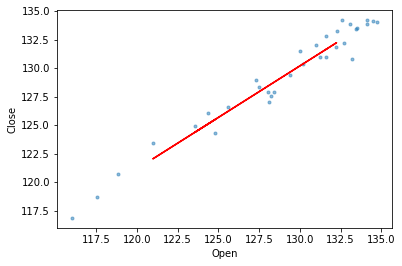

In [13]:
# Comprobar la bondad del ajuste mediante representación

c=X_test.Open.values
c = sm.add_constant(c)

rectaRegresion = model.predict(c) # El mismo resultado se obtendría si se calcula así: w0[0] + w1[0][0]*newx

plt.plot(X,y,'.', alpha = 0.5)
plt.xlabel('Open')
plt.ylabel('Close')

plt.plot(X_test.Open.values,rectaRegresion,'r')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

Existen distintas métricas de *performance*. En este caso, y coincidiendo con la función de coste que queremos minimizar, podemos calcular el **error cuadrático medio** (MSE, del inglés *Mean Squared Error*):

$$\textrm{MSE} = \frac{1}{N}\sum_{i=1}^{N}\left(y^{i}-f_{\omega}(x^{(i)})\right)^2$$

In [14]:
# Comprobar la bondad del ajuste mediante análisis de performance
X = sm.add_constant(X)

fw = model.predict(X.values)
MSE = np.mean( (y-fw)**2 )

print ('MSE = %.2f' % MSE)

MSE = 0.79


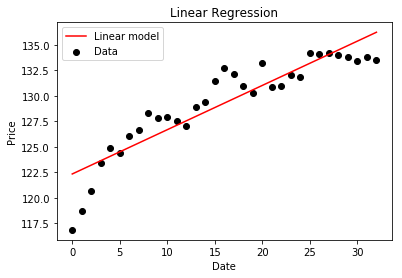

In [15]:

dates = np.reshape(data.index.values, (len(data.index.values),1)) # converting to matrix of n X 1
prices = np.reshape(data['Adj Close'].values, (len(data['Adj Close'].values),1))
linear_mod = linear_model.LinearRegression() # defining the linear regression model
linear_mod.fit(dates, prices) # fitting the data points in the model

plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
plt.plot(dates, linear_mod.predict(dates), color= 'red', label= 'Linear model') # plotting the line made by linear regression
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()
